# Week8 Word Embedding 词向量模型

### 1.课堂案例

### 2.个人作业分析

词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。

使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

# 1.课堂案例

## 1.1 数据准备 

In [2]:
import pandas as pd # 数据表
df = pd.read_excel('/Users/jiaojiao/Downloads/text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [3]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4l/_lcd9phj5pz4r5t7ryzwbtzh0000gn/T/jieba.cache
Loading model cost 0.242 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [4]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


## 1.2 词向量模型

In [6]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [7]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [8]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [9]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.6653445   1.2097315   0.65851307 -0.3904967  -0.4635592  -2.3540585
  0.8472597   3.253238   -1.3300376  -1.393784   -0.34546134 -1.9115258
 -0.18552424  1.228163    0.5989476  -0.7181832   0.31782028 -0.57650816
 -0.04678323 -2.2937715   1.1484989   0.00697208  0.67722106 -0.9220143
  0.05100203 -0.05075756 -0.4073683  -1.0276797  -0.8627557  -0.0685605
  1.0271789   0.5550616   0.19502275 -0.88699764 -0.6974383   1.6127632
  0.5550204  -1.1285105  -0.98700297 -2.4372165   0.04373182 -0.69153565
 -0.04361936 -0.88523227  0.90805274 -0.76871866 -1.4382416   0.32611856
  1.1784809   0.5969035   0.32126904 -0.29598656 -1.0104117  -0.08562008
 -0.5195109   0.9588949   0.31546032  0.03307967 -0.6967941   0.5614996
  0.4730502   0.4621612  -0.3886248   0.7443495  -0.8326047   1.4940982
  0.3287931   0.92419857 -1.384303    1.6478546  -0.85842866  1.2678015
  0.7239508  -0.13565265  1.6884576   0.43027756  0.11661611 -0.13783452
 -0.4942577   0.9188944  -0.39817128  0.15690649 -0.9654

In [10]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.717897
0.7085314
0.6209434
0.99641603
0.98661155
0.9898597


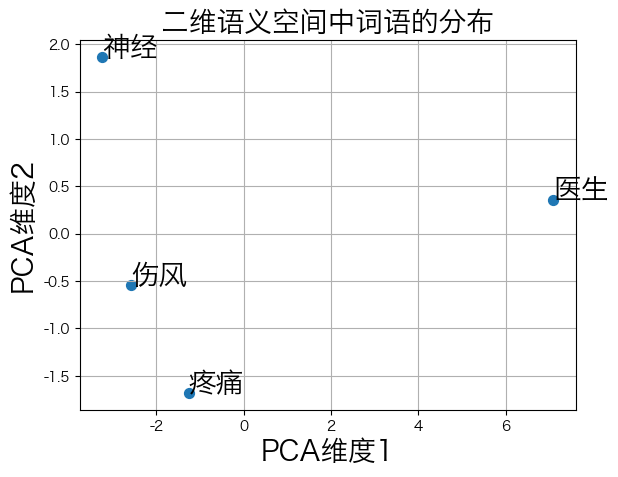

In [35]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [36]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78571.09375
Loss after epoch 1: 78157.296875
Loss after epoch 2: 73509.03125
Loss after epoch 3: 62475.265625
Loss after epoch 4: 55304.78125
Loss after epoch 5: 51654.5
Loss after epoch 6: 49541.28125
Loss after epoch 7: 47894.5625
Loss after epoch 8: 46280.9375
Loss after epoch 9: 44826.875
Loss after epoch 10: 43561.125
Loss after epoch 11: 42388.5
Loss after epoch 12: 40885.5625
Loss after epoch 13: 39931.5625
Loss after epoch 14: 38510.8125
Loss after epoch 15: 37478.0625
Loss after epoch 16: 36229.1875
Loss after epoch 17: 35478.8125
Loss after epoch 18: 34184.4375
Loss after epoch 19: 33427.625
Loss after epoch 20: 32628.125
Loss after epoch 21: 31792.25
Loss after epoch 22: 30894.0625
Loss after epoch 23: 30263.875
Loss after epoch 24: 29582.125
Loss after epoch 25: 28841.875
Loss after epoch 26: 28103.0
Loss after epoch 27: 27883.625
Loss after epoch 28: 27013.375
Loss after epoch 29: 26775.0
Loss after epoch 30: 26283.875
Loss after epoch 31: 25748.0
Loss 

# 2.个人作业分析

# 2.1数据准备

In [40]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('/Users/jiaojiao/Downloads/政府工作报告.csv')

# 将数据保存为XLSX文件
df.to_excel('/Users/jiaojiao/Downloads/政府工作报告.xlsx', index=False) 

In [44]:
import pandas as pd # 数据表


df = pd.read_excel('/Users/jiaojiao/Downloads/政府工作报告.xlsx', index_col = 0)
df

,report
year,
2023,新华社北京3月14日电政府工作报告 ——2023年3月5日在第十四届全国人民代表大会第一...
2022,各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提出意见。 ...
2021,各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提出意见。 ...
2020,新华社北京5月29日电 政府工作报告 ——2020年5月22日在第十三届全国人民代表...
2019,新华社北京3月16日电 政府工作报告 ——2019年3月5日在第十三届全国人民代表...
2018,各位代表： 现在，我代表国务院，向大会报告过去五年政府工作，对今年工作提出建议，请予审...
2017,各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出...
2016,政府工作报告 ——2016年3月5日在第十二届全国人民代表大会第四次会议上 国务院总理...
2015,国务院总理 李克强 各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并...


In [50]:
import pandas as pd

df = pd.read_excel('/Users/jiaojiao/Downloads/政府工作报告.xlsx')

# 检查DataFrame是否为空
if not df.empty:
    # 检查 'report' 列是否存在并且有数据
    if 'report' in df.columns and not df['report'].empty:
        # 访问 'report' 列的第一行数据
        test = df['report'].iloc[0]
        # 在此处处理 test 数据，这里假设你的数据清洗函数为 clean_text
        clean_text(test)
    else:
        print("The 'report' column does not exist or is empty.")
else:
    print("The DataFrame is empty.")

In [51]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['report'][0]
clean_text(test)

'\u3000 \u3000 新华社 北京 3 月 14 日电 政府 工作 报告 \xa0 — — 2023 年 3 月 5 日 在 第十四届 全国人民代表大会 第一次 会议 上 \xa0 国务院 总理 \u3000 李克强 \xa0 \xa0 \u3000 \u3000 3 月 5 日 ， 李克强 代表 国务院 在 十四届 全国人大 一次 会议 上作 《 政府 工作 报告 》 。 新华社 记者   饶 爱民   摄 \xa0 各位 代表 ： \u3000 \u3000 本届 政府 任期 即将 结束 。 现在 ， 我 代表 国务院 ， 向 大会 报告 工作 ， 请予 审议 ， 并 请 全国政协 委员 提出 意见 。 \u3000 \u3000 一 、 过去 一年 和 五年 工作 回顾 \xa0 \u3000 \u3000 2022 年 是 党和国家 历史 上 极为重要 的 一年 。 党 的 二十大 胜利 召开 ， 描绘 了 全面 建设 社会主义 现代化 国家 的 宏伟蓝图 。 面对 风高浪 急 的 国际 环境 和 艰巨 繁重 的 国内 改革 发展 稳定 任务 ， 以 习近平 同志 为 核心 的 党中央 团结 带领 全国 各族人民 迎难而上 ， 全面落实 疫情 要 防住 、 经济 要 稳住 、 发展 要 安全 的 要求 ， 加大 宏观调控 力度 ， 实现 了 经济 平稳 运行 、 发展 质量 稳步 提升 、 社会 大局 保持稳定 ， 我国 发展 取得 来 之 极为 不易 的 新 成就 。 \u3000 \u3000 过去 一年 ， 我国 经济 发展 遇到 疫情 等 国内外 多重 超 预期 因素 冲击 。 在 党中央 坚强 领导 下 ， 我们 高效 统筹 疫情 防控 和 经济社会 发展 ， 根据 病毒 变化 和 防疫 形势 ， 优化 调整 疫情 防控 措施 。 面对 经济 新 的 下行 压力 ， 果断 应对 、 及时 调控 ， 动用 近年 储备 的 政策 工具 ， 靠前 实施 既定政策 举措 ， 坚定不移 推进 供给 侧 结构性 改革 ， 出台 实施 稳 经济 一揽子 政策 和 接续 措施 ， 部署 稳住 经济 大盘 工作 ， 加强 对 地方 落实政策 的 督导 服务 ， 支持 各地 挖掘 政策 潜力 ， 支持 经济 大省勇 挑大梁 ， 突出 稳 增长 稳 就业 稳 物

In [53]:
df['report分词'] = df['report'].apply(clean_text)
df

,year,report,report分词
0,2023,新华社北京3月14日电政府工作报告 ——2023年3月5日在第十四届全国人民代表大会第一...,新华社 北京 3 月 14 日电 政府 工作 报告 — — 2023 年 3 月...
1,2022,各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提出意见。 ...,各位 代表 ： 现在 ， 我 代表 国务院 ， 向 大会 报告 政府 工作 ， 请予...
2,2021,各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提出意见。 ...,各位 代表 ： 现在 ， 我 代表 国务院 ， 向 大会 报告 政府 工作 ， 请予...
3,2020,新华社北京5月29日电 政府工作报告 ——2020年5月22日在第十三届全国人民代表...,新华社 北京 5 月 29 日电 政府 工作 报告 — — 2020...
4,2019,新华社北京3月16日电 政府工作报告 ——2019年3月5日在第十三届全国人民代表...,新华社 北京 3 月 16 日电 政府 工作 报告 — — 20...
5,2018,各位代表： 现在，我代表国务院，向大会报告过去五年政府工作，对今年工作提出建议，请予审...,各位 代表 ： 现在 ， 我 代表 国务院 ， 向 大会 报告 过去 五年 ...
6,2017,各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出...,各位 代表 ： 现在 ， 我 代表 国务院 ， 向 大会 报告 政府 工作 ...
7,2016,政府工作报告 ——2016年3月5日在第十二届全国人民代表大会第四次会议上 国务院总理...,政府 工作 报告 — — 2016 年 3 月 5 日 在 第十二届 全国人民代表大会 ...
8,2015,国务院总理 李克强 各位代表： 现在，我代表国务院，向大会报告政府工作，请予审议，并...,国务院 总理 李克强 各位 代表 ： 现在 ， 我 代表 国务院...
9,2014,3月5日，李克强代表国务院在十二届全国人大二次会议上作《政府工作报告》。 新华社记者姚大...,3 月 5 日 ， 李克强 代表 国务院 在 十二届 全国人大 二次 会议 上作 《...


# 2.2 词向量模型

In [54]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [55]:
corpus = df['report分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['新华社', '北京', '3', '月', '14', '日电', '政府', '工作', '报告', '—', '—', '2023', '年', '3', '月', '5', '日', '在', '第十四届', '全国人民代表大会', '第一次', '会议', '上', '国务院', '总理', '李克强', '3', '月', '5', '日', '，', '李克强', '代表', '国务院', '在', '十四届', '全国人大', '一次', '会议', '上作', '《', '政府', '工作', '报告', '》', '。', '新华社', '记者', '饶', '爱民', '摄', '各位', '代表', '：', '本届', '政府', '任期', '即将', '结束', '。', '现在', '，', '我', '代表', '国务院', '，', '向', '大会', '报告', '工作', '，', '请予', '审议', '，', '并', '请', '全国政协', '委员', '提出', '意见', '。', '一', '、', '过去', '一年', '和', '五年', '工作', '回顾', '2022', '年', '是', '党和国家', '历史', '上', '极为重要', '的', '一年', '。', '党', '的', '二十大', '胜利', '召开', '，', '描绘', '了', '全面', '建设', '社会主义', '现代化', '国家', '的', '宏伟蓝图', '。', '面对', '风高浪', '急', '的', '国际', '环境', '和', '艰巨', '繁重', '的', '国内', '改革', '发展', '稳定', '任务', '，', '以', '习近平', '同志', '为', '核心', '的', '党中央', '团结', '带领', '全国', '各族人民', '迎难而上', '，', '全面落实', '疫情', '要', '防住', '、', '经济', '要', '稳住', '、', '发展', '要', '安全', '的', '要求', '，', '加大', '宏观调控', '力度', '，', '实现', '了', '经济', '平稳', '运行', '、', '发展',

In [56]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [57]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

，: [-0.23093835  1.0046221  -0.7383885  -0.5516167  -0.07891905  0.12753795
  0.10508659  0.22553007 -1.4607316   0.71964633 -0.44877207 -0.16303942
 -0.4749431   0.57834476  0.22294098 -0.91658866 -0.96132815  1.3713682
 -0.7806732  -0.5288816   0.3089413  -1.0443963   0.15807427  0.36842594
  0.05966467 -0.10509397 -1.1052002   0.6821726  -0.6897998   0.5267705
 -0.7820254  -0.05906467 -0.26146227 -1.3512502  -0.66786575  0.64748037
 -0.33144674  0.06425873  0.93398106 -0.13250075 -1.1445698   0.0524398
 -0.41177675 -0.85689265 -0.00604269  0.6194394  -0.6207969   1.5660839
  1.5927321  -0.09987106  0.27403635 -0.30208325 -0.4366358  -0.77372193
 -0.01264195 -0.44838187  0.4791572   0.58717483 -1.1604061   0.9619652
  0.1372075  -0.30620384  0.07875686  0.5923345   0.2929307   0.2383804
  1.1963574   0.72662824 -0.53568316  0.16916671  0.30687624  0.9581671
 -0.99622524 -0.52434385 -0.42814484 -0.55486643  0.74925685 -0.6214744
  0.15041967 -0.806966    0.1333353  -0.95351064 -0.0709

In [59]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('创新', '经济'))
print(model.wv.similarity('创新', '发展'))
print(model.wv.similarity('产业', '发展'))
print(model.wv.similarity('产业', '科技'))
print(model.wv.similarity('技术', '科技'))
print(model.wv.similarity('经济', '创新'))

0.4973819
0.45504367
0.50847816
0.6882055
0.6281178
0.4973819


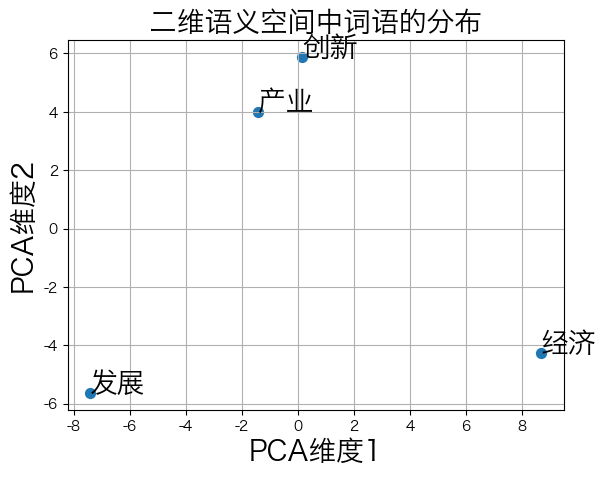

In [60]:
# 可视化

words = ['创新', '经济', '产业', '发展']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [61]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 454280.3125
Loss after epoch 1: 368272.625
Loss after epoch 2: 308502.5625
Loss after epoch 3: 292281.75
Loss after epoch 4: 275170.25
Loss after epoch 5: 259225.5
Loss after epoch 6: 243623.5
Loss after epoch 7: 215404.5
Loss after epoch 8: 216001.25
Loss after epoch 9: 209425.25
Loss after epoch 10: 203096.25
Loss after epoch 11: 193770.75
Loss after epoch 12: 188935.75
Loss after epoch 13: 188724.25
Loss after epoch 14: 181171.75
Loss after epoch 15: 182581.25
Loss after epoch 16: 180194.0
Loss after epoch 17: 157983.5
Loss after epoch 18: 155423.0
Loss after epoch 19: 153508.0
Loss after epoch 20: 155052.5
Loss after epoch 21: 153500.5
Loss after epoch 22: 148756.5
Loss after epoch 23: 146660.0
Loss after epoch 24: 146156.0
Loss after epoch 25: 144951.5
Loss after epoch 26: 143553.5
Loss after epoch 27: 142749.5
Loss after epoch 28: 145657.5
Loss after epoch 29: 139145.5
Loss after epoch 30: 139616.0
Loss after epoch 31: 138599.0
Loss after epoch 32: 138157.0
Lo